# Recommendation Systems

## 1. Introduction and Data

In this project we are going to take a look at one of the <a href="http://grouplens.org/datasets/movielens/">MovieLens</a> data sets, more precisely the smallest one (<a href="http://files.grouplens.org/datasets/movielens/ml-100k.zip">ml-100k.zip</a>). Our data set includes 100,000 ratings of ~1.700 movies from ~1.000 users.

We start by reading the data into a <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html">Pandas data frame</a>. This allows us to asses the quality of the data set and gain first insights. Once we have established a fundamental understanding we proceed by building a simple recommendation system for movies.

In [1]:
import os

data_path = '.' + os.sep + 'ml-100k'

The files we have got the following documentation. Note that we are just using 'u.data' and 'u.item', while throwing away some meta data.

<i>
<hr />
u.data     -- The full u data set, 100000 ratings by 943 users on 1682 items.
              Each user has rated at least 20 movies.  Users and items are
              numbered consecutively from 1.  The data is randomly
              ordered. This is a tab separated list of
	         user id | item id | rating | timestamp.
              The time stamps are unix seconds since 1/1/1970 UTC <br />

u.info     -- The number of users, items, and ratings in the u data set. <br />

u.item     -- Information about the items (movies); this is a tab separated
              list of
              movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |
              The last 19 fields are the genres, a 1 indicates the movie
              is of that genre, a 0 indicates it is not; movies can be in
              several genres at once.
              The movie ids are the ones used in the u.data data set. <br />

u.genre    -- A list of the genres. <br />

u.user     -- Demographic information about the users; this is a tab <br />
              separated list of
              user id | age | gender | occupation | zip code
              The user ids are the ones used in the u.data data set.
</i>
<hr />

So let's read our data.

In [2]:
import pandas as pd

movies = pd.read_csv(os.path.join(data_path, 'u.item'),
                     index_col=0,
                     sep='|',
                     header=None,
                     usecols=[0,1,2],
                     names=['movie_id', 'name', 'release_year'],
                     encoding = 'ISO-8859-1')
movies['release_year'] = movies['release_year'].apply(lambda s: None if pd.isnull(s) else int(s.split('-')[2]))



ratings = pd.read_csv(os.path.join(data_path, 'u.data'),
                      sep='\t',
                      header=None,
                      usecols=[0,1,2],
                      names=['movie_id', 'user_id', 'rating'])
ratings = ratings.merge(movies, 'left', left_on='movie_id', right_index=True)

print("{} data points were loaded.".format(len(ratings)))

#movies.head()
ratings.head()

100000 data points were loaded.


,movie_id,user_id,rating,name,release_year
0,196,242,3,Dead Poets Society (1989),1989.0
1,186,302,3,"Blues Brothers, The (1980)",1980.0
2,22,377,1,Braveheart (1995),1996.0
3,244,51,2,Smilla's Sense of Snow (1997),1997.0
4,166,346,1,Manon of the Spring (Manon des sources) (1986),1986.0


Pandas' data frames can sliced like Python's lists. For instance, to obtain the first 10 entries of a data frame df it can be written df[0:10] or df.head(10). Pandas supports basic descriptive statistics via the 'describe' method.

In [49]:
print(ratings.head(10))
print(ratings.describe().rating[1:])
print(movies.columns)

   movie_id  user_id  rating  \
0       196      242       3   
1       186      302       3   
2        22      377       1   
3       244       51       2   
4       166      346       1   
5       298      474       4   
6       115      265       2   
7       253      465       5   
8       305      451       3   
9         6       86       3   

                                                name  release_year  
0                          Dead Poets Society (1989)        1989.0  
1                         Blues Brothers, The (1980)        1980.0  
2                                  Braveheart (1995)        1996.0  
3                      Smilla's Sense of Snow (1997)        1997.0  
4     Manon of the Spring (Manon des sources) (1986)        1986.0  
5                                    Face/Off (1997)        1997.0  
6    Haunted World of Edward D. Wood Jr., The (1995)        1996.0  
7                            Pillow Book, The (1995)        1997.0  
8                         

In [56]:
movies = movies.reset_index()
print(movies.columns)

Index(['index', 'movie_id', 'name', 'release_year'], dtype='object')


Also advanced methods of selection are available. The following method gives an example of selecting all pairs of movies and ratings a specific user has done.

In [5]:
def rated_movies_by_user(user_id):
    return ratings[ratings['user_id'] == user_id][['movie_id', 'name', 'rating']]

print(rated_movies_by_user(242)[:10])

      movie_id                                         name  rating
0          196                    Dead Poets Society (1989)       3
253         63                     Santa Clause, The (1994)       3
629        226                            Die Hard 2 (1990)       5
1232       154          Monty Python's Life of Brian (1979)       3
2159       306  Mrs. Brown (Her Majesty, Mrs. Brown) (1997)       5
2335       296                          Promesse, La (1996)       4
2600        34                  Doom Generation, The (1995)       5
3484       271                     Starship Troopers (1997)       4
4082       201                          Evil Dead II (1987)       4
5548       209                    This Is Spinal Tap (1984)       4


Pandas supports some plotting capabilities out of the box (that, for instance, uses matplotlib).

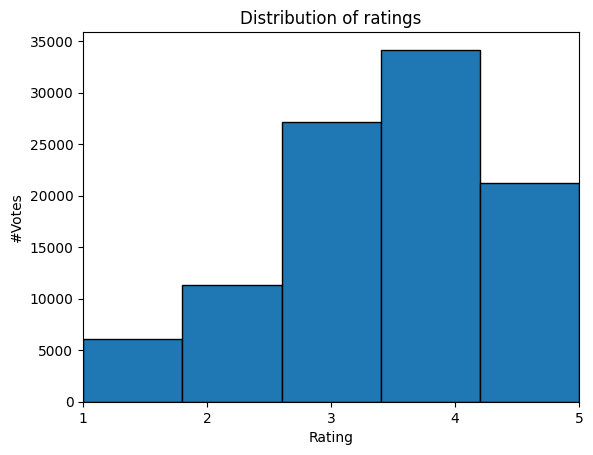

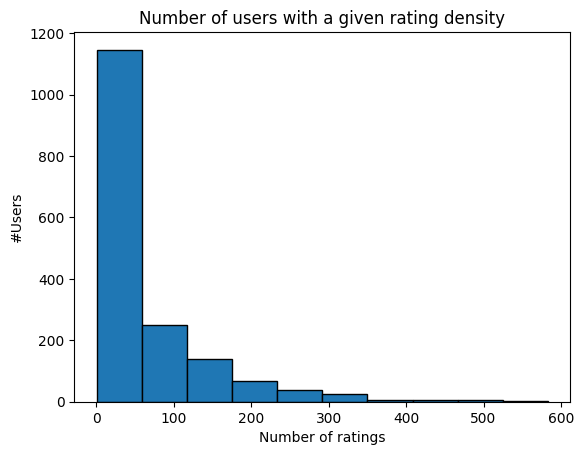

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

ratings.hist(bins=5, grid=False, column='rating', ec='k')
plt.xlim(1, 5)
plt.xlabel('Rating')
plt.ylabel('#Votes')
plt.title('Distribution of ratings')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

ratings.groupby('user_id')['rating'].count().hist(grid=False, ec='k')
plt.xlabel('Number of ratings')
plt.ylabel('#Users')
plt.title('Number of users with a given rating density')
plt.show()

#### Exercise 1.1
How is the distribution of the movies' release dates? What is the implication for the recommendation system? Could this data set be used to engineer a recommender for "film classics"?

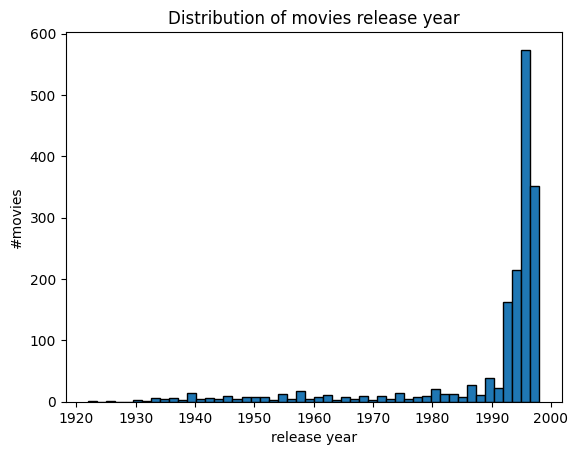

In [7]:
# Ex. 1.1
movies['release_year'].dropna().hist(bins=50,grid=False,edgecolor='black')
plt.xlabel('release year')
plt.ylabel('#movies')
plt.title('Distribution of movies release year')
plt.show()

Skewness in release years:most movies are released after 1900, it may suggest that users predominantly rate more recent movies, leading to a bias in favor of these newer titles and affect recommendations for older films.

Sparse Data for Older Movies: since fewer ratings for older movies, the recommendation system might struggle to recommend those.

In [8]:
classic_movies = movies[(movies['release_year'] >= 1950) & (movies['release_year'] <= 1970)]
print(classic_movies.head())



classic_movies=movies[(movies['release_year']>1940)&(movies['release_year']<1980)]
classic_movies.head()


                                         name  release_year
movie_id                                                   
30                       Belle de jour (1967)        1967.0
74        Faster Pussycat! Kill! Kill! (1965)        1965.0
102                    Aristocats, The (1970)        1970.0
131             Breakfast at Tiffany's (1961)        1961.0
135              2001: A Space Odyssey (1968)        1968.0


,name,release_year
movie_id,,
30,Belle de jour (1967),1967.0
50,Star Wars (1977),1977.0
74,Faster Pussycat! Kill! Kill! (1965),1965.0
102,"Aristocats, The (1970)",1970.0
127,"Godfather, The (1972)",1972.0


#### Exercise 1.2
Do the scoring behavior differ among users? Is this problematic for the recommendation system?

In [9]:
# Ex. 1.2

average_ratings = ratings.groupby('user_id')['rating'].mean()
print(average_ratings.describe())  

print('')

rating_std_dev = ratings.groupby('user_id')['rating'].std()
print(rating_std_dev.describe())



count    1682.000000
mean        3.076045
std         0.781662
min         1.000000
25%         2.659600
50%         3.161528
75%         3.653428
max         5.000000
Name: rating, dtype: float64

count    1541.000000
mean        1.056714
std         0.292709
min         0.000000
25%         0.915758
50%         1.034211
75%         1.169401
max         2.828427
Name: rating, dtype: float64


Lenient raters: These users give high ratings more frequently, which could inflate the apparent quality of certain movies.
Harsh raters: These users tend to rate movies more critically, which may make movies appear worse than they actually are to other users

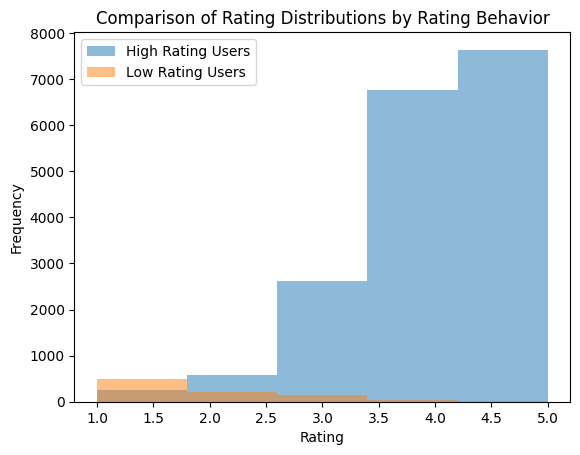

In [10]:
ratings['user_avg'] = ratings.groupby('user_id')['rating'].transform('mean')

high_ratings = ratings[ratings['user_avg'] > 4]
low_ratings = ratings[ratings['user_avg'] <= 2]

plt.hist(high_ratings['rating'], bins=5, alpha=0.5, label='High Rating Users')
plt.hist(low_ratings['rating'], bins=5, alpha=0.5, label='Low Rating Users')
plt.legend()
plt.title('Comparison of Rating Distributions by Rating Behavior')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [15]:
# Compute descriptive statistics for each user
user_stats = ratings.groupby('user_id')['rating'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
print(user_stats.head())


             mean  median       std  min  max  count
user_id                                             
1        3.878319     4.0  0.927897    1    5    452
2        3.206107     3.0  0.966497    1    5    131
3        3.033333     3.0  1.212760    1    5     90
4        3.550239     4.0  0.965069    1    5    209
5        3.302326     3.0  0.946446    1    5     86


## 2. Training of a Recommender System

Given $n$ users, $m$ movies and ratings $y_i$ that user $u^i$ gave for movie $x^i$ for $i = 1,\dots,r$. For a given integer $k$, the number of latent factors, we want to find the user factor matrix $\Psi \in \mathbb{R}^{n \times k}$ and the movie factor matrix $\Phi \in \mathbb{R}^{k \times m}$, that minimize the expression:

$$ L(y, \Psi, \Phi) = \sum_{i \in [r]}{\mathcal{l}\left(y^i, \Psi_{u^i} \Phi_{x^i} \right)} + \lambda( \|\Psi\|_F^2 + \| \Phi \|_F^2), $$

where $\| \cdot \|_F$ denotes the <a href="https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm">Frobenius norm</a>.

Writing $\hat B = \Psi \cdot \Phi$ as our estimated rating matrix and using the squared loss, we can rewrite the loss function as:

$$ L(y, \Psi, \Phi) = \sum_{i \in [r]}{(y^i - \hat B_{u^i, x^i})^2} + \lambda \left(\|\Psi\|_F^2 + \|\Phi\|_F^2\right). $$

We solve this problem by optimizing $L(y, \Psi, \Phi)$ by fixing one of the factor matrices and optimize by the other via gradient descent.

The loss function can be vectorized by looking at the rating matrix $B$ (which contains the $y^i$ at row $u^i$ and column $x^i$, unknown entries are marked with the symbol '?'). If we assume that $c + ? = ?$ and $c \cdot ? = 0$ for all real $c$. The loss function equals:

$$ L(B, \Psi, \Phi) = \left\|B - \hat B\right\|_F^2 + \lambda \left(\|\Psi\|_F^2 + \|\Phi\|_F^2\right) $$

To avoid the extra algebra defined on the symbol '?' in most cases we replace the '?' with $0$ (assume the rating labels are nonzero!) and consider a 'weight matrix' $W$, with $W_{i,j}$ is the indicator function whether user $i$ has rated movie $j$. Henceforth,

$$ L(B, \Psi, \Phi) = \left\| W \circ (\tilde B - \hat B) \right\|_F^2 + \lambda \left(\|\Psi\|_F^2 + \|\Phi\|_F^2\right), $$

where $\circ$ is the Hadamard or Schur product, defined as $(A \circ B)_{i, j} = A_{i, j} + B_{i, j}$ for any two matrices $A$ and $B$ of identical shape. Note that most practical implementations of sparse matrices assume that the values not set are zero, which is an important detail for the implementation of recommendation systems, where $B$ is usually a huge yet sparse matrix.

<hr />
Before we work on the movielens data set we are going through a simple example to make sure things are clear. Our goal is to find $k = 2$ latent factors. We have three users (Alice, Bob, Charlie), who rated four movies (Matrix, Zombieland, Titanic, Schindler's List), resulting in the following matrix:

$$  B = \begin{pmatrix} 5 & 4 & 1 & ? \\ 4 & ? & 5 & 4 \\ 5 & 3 & ? & 4 \end{pmatrix}. $$

To make handling these matrices easier, we are replacing the unknown values with zeros (giving us $\tilde B$) and hold a 'weight matrix' $W \in \mathbb{R}^{n \times m}$ that has the same shape as the rating matrix and $W_{i, j}$ is set to the indicator function if there exists a rating by user $i$ of movie $j$.

$$ \begin{align} \tilde B = \begin{pmatrix} 5 & 4 & 1 & 0 \\ 4 & 0 & 5 & 4 \\ 5 & 3 & 0 & 4 \end{pmatrix},
&& W = \begin{pmatrix} 1 & 1 & 1 & 0 \\ 1 & 0 & 1 & 1 \\ 1 & 1 & 0 & 1 \end{pmatrix}. \end{align}$$

From now an we drop the tilde from $\tilde B$.

The implementation of the loss function without regularization can be done as follows:

In [16]:
import numpy as np

B = np.asarray(np.matrix('5 4 1 0; 4 0 5 4; 5 3 0 4'))
W = np.asarray(np.matrix('1 1 1 0; 1 0 1 1; 1 1 0 1'))

def frobenius(A):
    return np.linalg.norm(A, 'fro')

def schur(A, B):
    """
    Computes the Schur product of A and B.
    The * operator for numpy.ndarrays is precisely the Schur product.
    """
    return np.asarray(A) * np.asarray(B)

def loss(B_hat, B, W):
    return frobenius(schur(W, B - B_hat))**2 # A.base * B.base equals the Schur product of A and B.

print(loss(B, B, W))
print(loss(np.matrix('4 4 1 2; 4 0 5 4; 5 3 0 4'), B , W))

0.0
1.0


#### Exercise 2.1
Implement the loss function $$ L(B, \Psi, \Phi) = \left\| W \circ ( \Psi \cdot \Phi - B) \right\|_F^2 + \lambda \left(\|\Psi\|_F^2 + \|\Phi\|_F^2\right), $$ with and without regularization.

In [ ]:
# Ex. 2.1

# Ex. 2.1

def loss(Psi, Phi, B, W):
    """
    Computes the loss function L(B, Psi, Phi) = ||W ∘ (Psi * Phi - B)||_F^2
    without regularization.
    
    Args:
        Psi (ndarray): User factor matrix, shape (n_users, k)
        Phi (ndarray): Movie factor matrix, shape (k, n_movies)
        B (ndarray): Rating matrix, shape (n_users, n_movies)
        W (ndarray): Weight matrix, shape (n_users, n_movies)
        
    Returns:
        float: Loss value.
    """
    B_hat = Psi @ Phi  # Compute predicted rating matrix
    error = W * (B_hat - B)  # Weighted error
    return np.linalg.norm(error, 'fro') ** 2  # Frobenius norm squared

def reg_loss(Psi, Phi, B, W, lambd=0.1):
    """
    Computes the loss function with regularization:
    L(B, Psi, Phi) = ||W ∘ (Psi * Phi - B)||_F^2 + λ(||Psi||_F^2 + ||Phi||_F^2).
    
    Args:
        Psi (ndarray): User factor matrix, shape (n_users, k)
        Phi (ndarray): Movie factor matrix, shape (k, n_movies)
        B (ndarray): Rating matrix, shape (n_users, n_movies)
        W (ndarray): Weight matrix, shape (n_users, n_movies)
        lambd (float): Regularization parameter (default: 0.1)
        
    Returns:
        float: Regularized loss value.
    """
    B_hat = Psi @ Phi  # Compute predicted rating matrix
    error = W * (B_hat - B)  # Weighted error
    # Penalizes large entries in ΨΨ and ΦΦ to avoid overfitting.
    reg_term = lambd * (np.linalg.norm(Psi, 'fro') ** 2 + np.linalg.norm(Phi, 'fro') ** 2)  # Regularization term
    return np.linalg.norm(error, 'fro') ** 2 + reg_term


In [18]:
# Example data
B = np.array([[5, 4, 1, 0], [4, 0, 5, 4], [5, 3, 0, 4]])
W = np.array([[1, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 1]])
Psi = np.random.rand(3, 2)  # 3 users, 2 latent factors
Phi = np.random.rand(2, 4)  # 2 latent factors, 4 movies

# Loss without regularization
print("Loss without regularization:", loss(Psi, Phi, B, W))

# Loss with regularization
print("Loss with regularization:", reg_loss(Psi, Phi, B, W, lambd=0.1))


Loss without regularization: 115.18590354377157
Loss with regularization: 115.8142673699117


The following code minimize the regularised loss function by the Alternating Least Squares method presented in the lecture. Compare with the lecture slides and try to understand the steps of the algorithm.

In [19]:
import time

def incremental_als(B, W, k, lambd=0.1, iterations=10, verbose=True):
    m_user, n_movies = B.shape
    Psi = np.random.rand(m_user, k) # latent user features
    Phi = np.random.rand(k, n_movies) # latent movie features

    losses = np.zeros(iterations)
    for n in range(iterations):
        t0 = time.time()

        # opt. for all user
        for u, Wu in enumerate(W):
            Psi[u] = np.linalg.solve(np.dot(Phi, np.dot(np.diag(Wu), Phi.T)) + lambd * np.eye(k),
                                   np.dot(Phi, np.dot(np.diag(Wu), B[u].T))).T

        # opt. for all movies
        for x, Wx in enumerate(W.T):
            Phi[:,x] = np.linalg.solve(np.dot(Psi.T, np.dot(np.diag(Wx), Psi)) + lambd * np.eye(k),
                                     np.dot(Psi.T, np.dot(np.diag(Wx), B[:, x])))

        losses[n] = frobenius(schur(W, B - Psi.dot(Phi)))**2

        if verbose:
            print('[round: {}, duration: {:6.2f} sec., loss: {:6.2f}]'.format(n, time.time() - t0, losses[n]))

    if verbose:
        plt.plot(losses, marker='s')
        plt.xlabel('Iteration Round')
        plt.ylabel('Squared Loss')

    return Psi, Phi

#### Exercise 2.2
Use the implementation of the incremental_als methode to approximate $\Psi$ and $\Phi$ with 2 latent features for our example matrices $B$ and $W$.

[round: 0, duration:   0.00 sec., loss:   2.52]
[round: 1, duration:   0.00 sec., loss:   0.66]
[round: 2, duration:   0.00 sec., loss:   0.15]
[round: 3, duration:   0.00 sec., loss:   0.04]
[round: 4, duration:   0.00 sec., loss:   0.02]
[round: 5, duration:   0.00 sec., loss:   0.02]
[round: 6, duration:   0.00 sec., loss:   0.02]
[round: 7, duration:   0.00 sec., loss:   0.02]
[round: 8, duration:   0.00 sec., loss:   0.02]
[round: 9, duration:   0.00 sec., loss:   0.02]

Approximated User Features Matrix (Psi):
[[3.13082859 0.55747115]
 [1.4211263  3.31020738]
 [2.73007484 1.52472289]]

Approximated Movie Features Matrix (Phi):
[[ 1.49399068  1.30958092  0.06417529  1.02508293]
 [ 0.56943627 -0.34102447  1.46852941  0.76597601]]

Reconstructed Rating Matrix (B_pred):
[[4.99487303 3.90996208 1.01958461 3.63636847]
 [4.00810161 0.73221817 4.95233809 3.99231176]
 [4.94693889 3.05528611 2.41430375 3.96645428]]


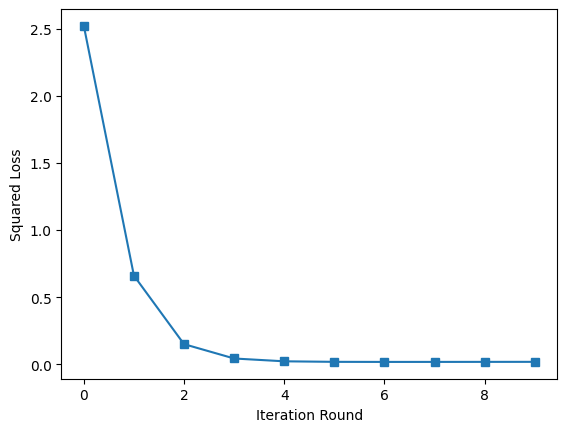

In [20]:
# Ex. 2.2
import numpy as np

# Define B and W matrices
B = np.array([[5, 4, 1, 0], 
              [4, 0, 5, 4], 
              [5, 3, 0, 4]])  

W = np.array([[1, 1, 1, 0], 
              [1, 0, 1, 1], 
              [1, 1, 0, 1]])  

# Set parameters
k = 2  # Number of latent features
lambda_reg = 0.1  # Regularization term
iterations = 10  # Number of iterations

# Call the ALS implementation
Psi, Phi = incremental_als(B, W, k, lambd=lambda_reg, iterations=iterations, verbose=True)

# Display the results
print("\nApproximated User Features Matrix (Psi):")
print(Psi)

print("\nApproximated Movie Features Matrix (Phi):")
print(Phi)

# Reconstructed rating matrix
B_pred = Psi.dot(Phi)
print("\nReconstructed Rating Matrix (B_pred):")
print(B_pred)


#### Exercise 2.3
We can now predict ratings for movies by calculating $\hat B = \Psi \cdot \Phi$. Would Alice like Schindler's list? (Alice is the first row, Schindler's list is the fourth column)

In [21]:
# Ex. 2.3

import numpy as np

# Example matrices Psi (user features) and Phi (movie features)
Psi = np.array([[0.8, 1.2],
                [0.5, 0.7],
                [1.0, 0.9]])

Phi = np.array([[1.1, 0.9, 1.0, 0.8],
                [0.7, 1.2, 0.8, 1.3]])

# Calculate the predicted rating matrix
B_hat = np.dot(Psi, Phi)

# Alice's index (0) and Schindler's List index (3)
alice_index = 0  # First row corresponds to Alice
schindler_index = 3  # Fourth column corresponds to Schindler's List

# Predicted rating for Alice and Schindler's List
predicted_rating = B_hat[alice_index, schindler_index]

print(f"Predicted rating for Alice and Schindler's List: {predicted_rating:.2f}")

# Interpret the rating
if predicted_rating >= 3.0:
    print("Alice would likely enjoy Schindler's List.")
else:
    print("Alice might not enjoy Schindler's List.")



Predicted rating for Alice and Schindler's List: 2.20
Alice might not enjoy Schindler's List.


## 3. Working on the MovieLens data

Lets get back to the MovieLens data. We will reduce the number of users so training time will only take a couple of seconds instead of minutes.

In [22]:
np.random.seed(0)
user_ids = ratings.user_id.unique()
drop_users = np.random.permutation(user_ids)[500:] # keep 500 users randomly
drop_index = ratings.index[ratings.user_id.apply(lambda idx: idx in drop_users).values]
ratings = ratings.drop(drop_index).reset_index(drop=True)

print('Number of users: {}'.format(ratings.user_id.unique().shape[0]))

Number of users: 500


#### Exercise 3.1
placing everything we did so far together. We Construct the $B$ and $W$ matrix from the MovieLens data. The <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html">pandas.pivot_table</a> method can be helpful. Learn $\Psi$ and $\Phi$  with 50 latent features and $\lambda = 2.5$. Print out the top 10 rated movies for some users and compare with the predicted rating from the recommender.

[round: 0, duration: 8.10 sec., loss: 10451.09]
[round: 1, duration: 7.10 sec., loss: 4742.15]
[round: 2, duration: 7.04 sec., loss: 3483.61]
[round: 3, duration: 6.98 sec., loss: 2945.33]
[round: 4, duration: 7.62 sec., loss: 2652.75]
[round: 5, duration: 6.99 sec., loss: 2469.61]
[round: 6, duration: 7.02 sec., loss: 2343.76]
[round: 7, duration: 7.29 sec., loss: 2251.39]
[round: 8, duration: 7.12 sec., loss: 2180.17]
[round: 9, duration: 7.00 sec., loss: 2123.22]


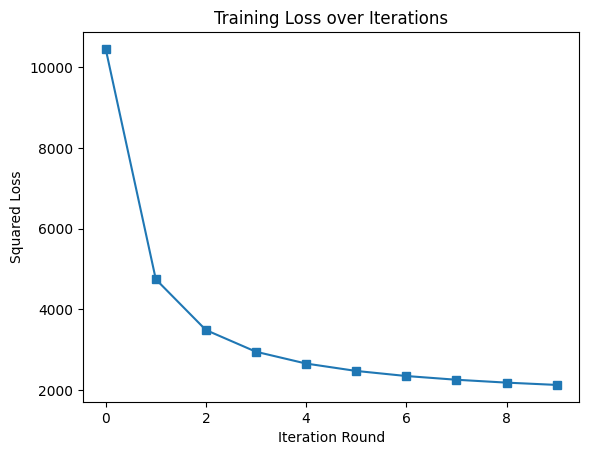

In [23]:
# Ex. 3.1

# Creating pivot table for B (user-item matrix) and W (weight matrix)
B = ratings.pivot_table(index='user_id', columns='movie_id', values='rating', fill_value=0).values
W = (B > 0).astype(int)  # Indicator matrix

# Function definitions for frobenius and schur product
def frobenius(A):
    return np.linalg.norm(A, 'fro')

def schur(A, B):
    return np.asarray(A) * np.asarray(B)

# Incremental ALS implementation
def incremental_als(B, W, k, lambd=2.5, iterations=10, verbose=True):
    m_user, n_movies = B.shape
    Psi = np.random.rand(m_user, k)  # Latent user features
    Phi = np.random.rand(k, n_movies)  # Latent movie features

    losses = np.zeros(iterations)
    for n in range(iterations):
        t0 = time.time()

        # Optimize user features
        for u, Wu in enumerate(W):
            Psi[u] = np.linalg.solve(
                np.dot(Phi, np.dot(np.diag(Wu), Phi.T)) + lambd * np.eye(k),
                np.dot(Phi, np.dot(np.diag(Wu), B[u].T))
            ).T

        # Optimize movie features
        for x, Wx in enumerate(W.T):
            Phi[:, x] = np.linalg.solve(
                np.dot(Psi.T, np.dot(np.diag(Wx), Psi)) + lambd * np.eye(k),
                np.dot(Psi.T, np.dot(np.diag(Wx), B[:, x]))
            )

        # Compute loss
        losses[n] = frobenius(schur(W, B - Psi.dot(Phi))) ** 2

        if verbose:
            print(f'[round: {n}, duration: {time.time() - t0:.2f} sec., loss: {losses[n]:.2f}]')

    if verbose:
        import matplotlib.pyplot as plt
        plt.plot(losses, marker='s')
        plt.xlabel('Iteration Round')
        plt.ylabel('Squared Loss')
        plt.title('Training Loss over Iterations')
        plt.show()

    return Psi, Phi

# Train the model
k = 50  # Number of latent features
Psi, Phi = incremental_als(B, W, k, lambd=2.5, iterations=10)


In [57]:
# Predict ratings
B_hat = np.dot(Psi, Phi)

# Map movie IDs to movie names
movie_mapping = movies.set_index('movie_id')['name'].to_dict()

# Function to get top-rated movies
def get_top_movies(user_id, B, B_hat, movie_mapping, top_n=10):
    user_idx = user_id - 1  # Map user_id to row index
    rated_movies = np.where(B[user_idx] > 0)[0]
    predicted_ratings = B_hat[user_idx]

    # Get top movies
    top_predicted = np.argsort(predicted_ratings)[::-1][:top_n]
    top_actual = np.argsort(B[user_idx])[::-1][:top_n]

    print(f"\nTop {top_n} Predicted Movies for User {user_id}:")
    for idx in top_predicted:
        print(f"{movie_mapping[idx]} (Predicted: {predicted_ratings[idx]:.2f})")

    print(f"\nTop {top_n} Actual Rated Movies for User {user_id}:")
    for idx in top_actual:
        print(f"{movie_mapping[idx]} (Actual: {B[user_idx, idx]:.2f})")

# Example: Evaluate for a random user
get_top_movies(user_id=1, B=B, B_hat=B_hat, movie_mapping=movie_mapping, top_n=10)



Top 10 Predicted Movies for User 1:
Rosencrantz and Guildenstern Are Dead (1990) (Predicted: 4.99)
Courage Under Fire (1996) (Predicted: 4.95)
Bound (1996) (Predicted: 4.92)
Chamber, The (1996) (Predicted: 4.83)
Jungle2Jungle (1997) (Predicted: 4.81)
Die Hard: With a Vengeance (1995) (Predicted: 4.74)
Meet Me in St. Louis (1944) (Predicted: 4.62)
Son in Law (1993) (Predicted: 4.61)
Amityville: Dollhouse (1996) (Predicted: 4.54)
Sabrina (1954) (Predicted: 4.50)

Top 10 Actual Rated Movies for User 1:
Courage Under Fire (1996) (Actual: 5.00)
Die Hard: With a Vengeance (1995) (Actual: 5.00)
Othello (1995) (Actual: 5.00)
Amityville: Dollhouse (1996) (Actual: 5.00)
Bound (1996) (Actual: 5.00)
Chamber, The (1996) (Actual: 5.00)
Jungle2Jungle (1997) (Actual: 5.00)
Son in Law (1993) (Actual: 5.00)
Sabrina (1954) (Actual: 5.00)
Meet Me in St. Louis (1944) (Actual: 5.00)


 We still don't know whether we over or under fit the data and which $k$ and $\lambda$ would be best. The incremental_cv_als method is an extended which takes a training and a test set as input and additionally returns the training and test loss.

In [58]:
def incremental_cv_als(B_train, W_train, B_test, W_test, k, lambd=0.1, iterations=10, verbose=True):
    m_user, n_movies = B_train.shape
    Psi = np.random.rand(m_user, k) # latent user features
    Phi = np.random.rand(k, n_movies) # latent movie features

    losses_train = np.zeros(iterations)
    losses_test = np.zeros(iterations)
    for n in range(iterations):
        t0 = time.time()

        # opt. for all user
        for u, Wu in enumerate(W_train):
            Psi[u] = np.linalg.solve(np.dot(Phi, np.dot(np.diag(Wu), Phi.T)) + lambd * np.eye(k),
                                   np.dot(Phi, np.dot(np.diag(Wu), B_train[u].T))).T

        # opt. for all movies
        for x, Wx in enumerate(W_train.T):
            Phi[:,x] = np.linalg.solve(np.dot(Psi.T, np.dot(np.diag(Wx), Psi)) + lambd * np.eye(k),
                                     np.dot(Psi.T, np.dot(np.diag(Wx), B_train[:, x])))

        losses_train[n] = frobenius(schur(W_train, B_train - Psi.dot(Phi)))**2
        losses_test[n] = frobenius(schur(W_test, B_test - Psi.dot(Phi)))**2

        if verbose:
            out_str = '[round: {}, duration: {:6.2f} sec., loss: {:6.2f}, test loss: {:6.2f}]'
            print(out_str.format(n, time.time() - t0, losses_train[n], losses_test[n]))

    if verbose:
        plt.plot(losses_train, marker='s', label='train')
        plt.plot(losses_test, marker='s', label='test')
        plt.xlabel('Iteration Round')
        plt.ylabel('Squared Loss')
        plt.legend(loc='best')

        return (Psi, Phi), (losses_train[-1], losses_test[-1])

#### Exercise 3.2
Split the data in a training and test set by creating $B_{train}$ and $B_{test}$ matrix from $B$ in such a way that about 75% percent of the ratings from $B$ are in $B_{train}$ and the remaining 25% of the ratings are in $B_{test}$ . Also construct $W_{train}$ and $W_{test}$. Use the incremental_cv_als to search for good parameter $k$ and $\lambda$ which minimize the test loss and don't over fit on the training set.

In [59]:
# Ex. 3.2
import numpy as np

# Assume B and W are already defined
np.random.seed(0)

# Create boolean mask for splitting
non_zero_indices = np.array(np.where(B > 0)).T
num_ratings = non_zero_indices.shape[0]
num_train = int(0.75 * num_ratings)

# Shuffle and split indices
shuffled_indices = np.random.permutation(non_zero_indices)
train_indices = shuffled_indices[:num_train]
test_indices = shuffled_indices[num_train:]

# Initialize train and test matrices
B_train = np.zeros_like(B)
B_test = np.zeros_like(B)
W_train = np.zeros_like(W)
W_test = np.zeros_like(W)

# Populate train and test matrices
for i, j in train_indices:
    B_train[i, j] = B[i, j]
    W_train[i, j] = 1

for i, j in test_indices:
    B_test[i, j] = B[i, j]
    W_test[i, j] = 1
